In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# função de decisão
def omega(Z):
    return np.where(Z>=0,1,0)

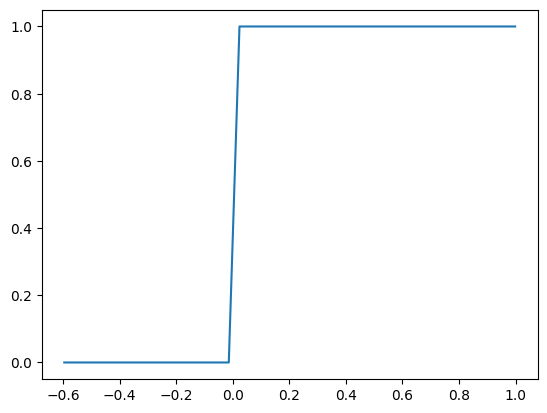

In [34]:
Z = np.random.uniform(-0.6,1,size=(100,1))
plt.plot(np.sort(Z,axis=0),omega(np.sort(Z,axis=0)))
plt.show()